# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [57]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [58]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1)
data['MEDV'] = boston.target

In [59]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [60]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [61]:
# Your code here :
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be for testing
# random_state=42 ensures we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (404, 13)
Testing set shape: (102, 13)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [62]:
# Your code here :
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Generate predictions on both the training and testing sets
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

print("First 5 predictions on the test set:", y_pred_test[:5])
print("First 5 actual values from the test set:", y_test.values[:5])

First 5 predictions on the test set: [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]
First 5 actual values from the test set: [23.6 32.4 13.6 22.8 16.1]


## 3. Calculate and print R-squared for both the training and the testing set.

In [63]:
# Your code here :
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R-squared for the training set: {r2_train:.4f}")
print(f"R-squared for the testing set: {r2_test:.4f}")

R-squared for the training set: 0.7509
R-squared for the testing set: 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [64]:
# Your code here :
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Mean Squared Error for the training set: {mse_train:.4f}")
print(f"Mean Squared Error for the testing set: {mse_test:.4f}")

Mean Squared Error for the training set: 21.6414
Mean Squared Error for the testing set: 24.2911


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [65]:
# Your code here :
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Mean Absolute Error for the training set: {mae_train:.4f}")
print(f"Mean Absolute Error for the testing set: {mae_test:.4f}")

Mean Absolute Error for the training set: 3.3148
Mean Absolute Error for the testing set: 3.1891


## Classification Model Evaluation

In [66]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y_iris = pd.Series(iris_data.target)

In [67]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [68]:
column_names = data.feature_names

In [69]:
df = pd.DataFrame(data['data'],columns=column_names)

In [70]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [71]:
target = pd.DataFrame(data.target)

In [72]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [73]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [74]:
# Your code here :
# We use stratify=y_iris to ensure that the proportion of each flower class
# is the same in both the training and testing sets. This is a best practice for classification.
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

print("Training set shape:", X_train_iris.shape)
print("Testing set shape:", X_test_iris.shape)

Training set shape: (120, 4)
Testing set shape: (30, 4)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [75]:
# Your code here :
from sklearn.linear_model import LogisticRegression

# Initialize and train the model. max_iter is increased to ensure convergence.
log_model = LogisticRegression(max_iter=200, random_state=42)
log_model.fit(X_train_iris, y_train_iris)

# Generate predictions
y_pred_train_iris = log_model.predict(X_train_iris)
y_pred_test_iris = log_model.predict(X_test_iris)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [76]:
# Your code here :
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train_iris, y_pred_train_iris)
acc_test = accuracy_score(y_test_iris, y_pred_test_iris)

print(f"Accuracy score for the training set: {acc_train:.4f}")
print(f"Accuracy score for the testing set: {acc_test:.4f}")

Accuracy score for the training set: 0.9750
Accuracy score for the testing set: 0.9667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [77]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

bal_acc_train = balanced_accuracy_score(y_train_iris, y_pred_train_iris)
bal_acc_test = balanced_accuracy_score(y_test_iris, y_pred_test_iris)

print(f"Balanced Accuracy for the training set: {bal_acc_train:.4f}")
print(f"Balanced Accuracy for the testing set: {bal_acc_test:.4f}")

Balanced Accuracy for the training set: 0.9750
Balanced Accuracy for the testing set: 0.9667


## 10. Calculate and print the precision score for both the training and the testing set.

In [78]:
# Your code here :
from sklearn.metrics import precision_score

# 'macro' calculates the metric for each label, and finds their unweighted mean.
prec_train = precision_score(y_train_iris, y_pred_train_iris, average='macro')
prec_test = precision_score(y_test_iris, y_pred_test_iris, average='macro')

print(f"Precision score for the training set: {prec_train:.4f}")
print(f"Precision score for the testing set: {prec_test:.4f}")

Precision score for the training set: 0.9752
Precision score for the testing set: 0.9697


## 11. Calculate and print the recall score for both the training and the testing set.

In [79]:
# Your code here :
from sklearn.metrics import recall_score

recall_train = recall_score(y_train_iris, y_pred_train_iris, average='macro')
recall_test = recall_score(y_test_iris, y_pred_test_iris, average='macro')

print(f"Recall score for the training set: {recall_train:.4f}")
print(f"Recall score for the testing set: {recall_test:.4f}")

Recall score for the training set: 0.9750
Recall score for the testing set: 0.9667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [80]:
# Your code here :
from sklearn.metrics import f1_score

f1_train = f1_score(y_train_iris, y_pred_train_iris, average='macro')
f1_test = f1_score(y_test_iris, y_pred_test_iris, average='macro')

print(f"F1 score for the training set: {f1_train:.4f}")
print(f"F1 score for the testing set: {f1_test:.4f}")

F1 score for the training set: 0.9750
F1 score for the testing set: 0.9666


## 13. Generate confusion matrices for both the training and the testing set.

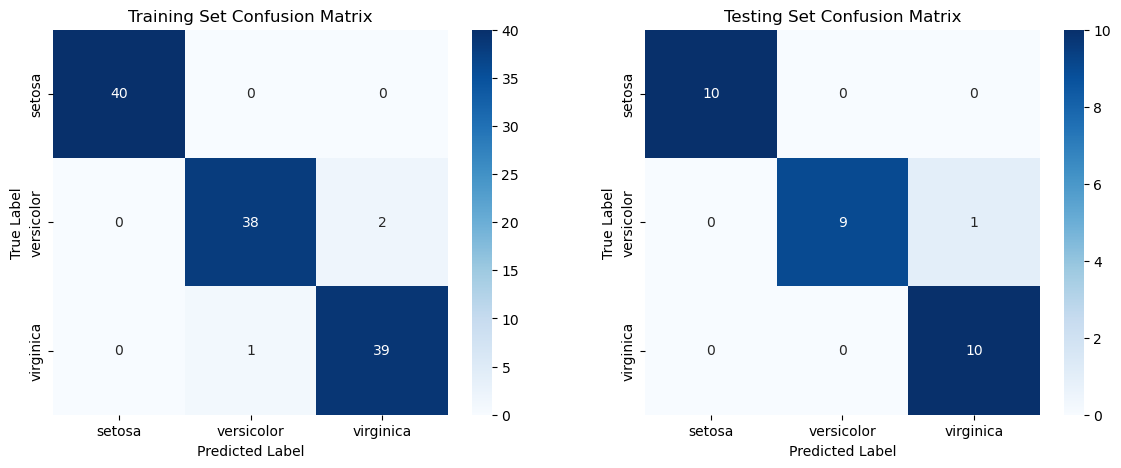

In [81]:
# Your code here :
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrices
cm_train = confusion_matrix(y_train_iris, y_pred_train_iris)
cm_test = confusion_matrix(y_test_iris, y_pred_test_iris)

# Plot the matrices using seaborn for a nice visual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
axes[1].set_title('Testing Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [82]:
# Have fun here !